In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('clients.csv')
df = pd.read_csv(data)


# grouped_by_creditstatus_df = df.groupby('default_payment_next_month').mean()
# grouped_by_creditstatus_df

# Review the DataFrame
df.head()


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000  2.0        2.0       1.0  24.0      2    2.0   -1.0   -1.0   
1   2     120000  2.0        2.0       2.0  26.0     -1    2.0    0.0    0.0   
2   3      90000  2.0        2.0       2.0  34.0      0    0.0    0.0    0.0   
3   4      50000  2.0        2.0       1.0  37.0      0    0.0    0.0    0.0   
4   5      50000  1.0        2.0       1.0  57.0     -1    0.0   -1.0    0.0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0          0        0.0         0     689.0       0.0   
1  ...     3272.0       3455     3261.0         0    1000.0    1000.0   
2  ...    14331.0      14948    15549.0      1518    1500.0    1000.0   
3  ...    28314.0      28959    29547.0      2000    2019.0    1200.0   
4  ...    20940.0      19146    19131.0      2000   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0       0.0         0       0.0                           1  
1    1000.0         0    2000.0                           1  
2    1000.0      1000    5000.0                           0  
3    1100.0      1069    1000.0                           0  
4    9000.0       689     679.0                           0  

[5 rows x 25 columns]

In [3]:
# Create a DataFrame with the scaled data for selected columns
df_scaled = df[["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].copy()
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df_scaled), columns=df_scaled.columns)

# Copy the remaining columns to df_scaled
df_scaled[["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default_payment_next_month"]] = df[["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default_payment_next_month"]]

# Deleting the missing values, given the low number of them, this change will not affect the results significantly, so our models will work seamlessly.
df_scaled =  df_scaled.dropna()


In [114]:
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models

# from sklearn.cluster import KMeans

# # Create a list with the number of k-values from 1 to 11
# k = list(range(1, 11))

# # Create an empty list to store the inertia values
# inertia = []

# # Create a for loop to compute the inertia with each possible value of k
# # Inside the loop:
# # 1. Create a KMeans model using the loop counter for the n_clusters
# # 2. Fit the model to the data using `df_market_data_scaled`
# # 3. Append the model.inertia_ to the inertia list
# for i in k:
#     k_model = KMeans(n_clusters=i, random_state=1)
#     k_model.fit(df_scaled)
#     inertia.append(k_model.inertia_)
    
# # Create a dictionary with the data to plot the Elbow curve
# elbow_data = {"k": k, "inertia": inertia}
# df_elbow1 = pd.DataFrame(elbow_data)

# # Create a DataFrame with the data to plot the Elbow curve
# df_elbow1.head()

C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jlozan02\Anaconda3\envs\PythonD

k        inertia
0  1  679590.568902
1  2  553015.771268
2  3  461596.449346
3  4  420934.783250
4  5  398308.854699

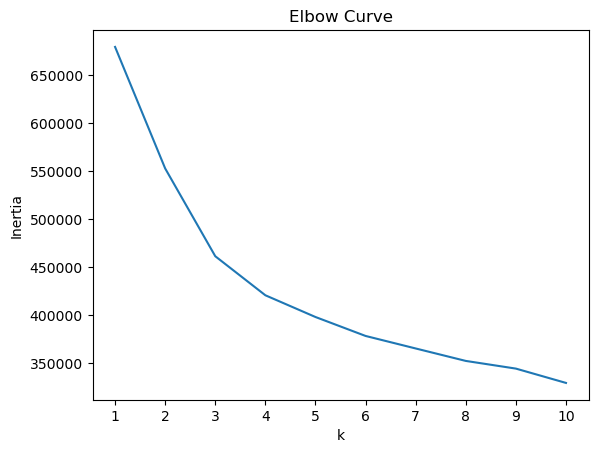

In [115]:
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models


# # Plot a line chart with all the inertia values computed with 
# # the different values of k to visually identify the optimal value for k.

# import matplotlib.pyplot as plt

# # Assuming df_elbow1 is a DataFrame containing k and inertia values

# plt.plot(df_elbow1["k"], df_elbow1["inertia"])
# plt.title("Elbow Curve")
# plt.xlabel("k")
# plt.ylabel("Inertia")
# plt.xticks(k)
# plt.show()


In [116]:
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models


# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans

# # Assuming df_scaled contains the scaled data

# # Initialize the K-Means model using the best value for k
# model = KMeans(n_clusters=4, random_state=1)

# # Fit the K-Means model using the scaled data
# model.fit(df_scaled)

# # Predict the clusters to group the cryptocurrencies using the scaled data
# segments = model.predict(df_scaled)

# # Convert the segments array into a DataFrame
# segments_df = pd.DataFrame(segments, columns=['segments'])

# # Create a copy of the scaled DataFrame
# df_scaled_segments = df_scaled.copy()

# # Add a new column to the DataFrame with the predicted clusters
# df_scaled_segments['segments'] = segments_df

# # Display sample data
# df_scaled_segments.head()
# df_scaled_segments.columns


C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'EDUCATION', 'MARRIAGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default_payment_next_month', 'segments'],
      dtype='object')

In [117]:
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models


# import plotly.express as px

# fig = px.scatter_3d(
#     df_scaled_segments,
#     x="LIMIT_BAL",
#     y="AGE",
#     z="BILL_AMT1",
#     color="segments"
# )

# fig.update_layout(scene=dict(
#     xaxis_title="Limit Balance",
#     yaxis_title="Age",
#     zaxis_title="Balance"
# ))

# fig.show()


In [4]:
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models


# # Specify the columns to convert to dummies
# columns_to_dummies = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6","segments"]

# # Convert categorical data to numeric with pd.get_dummies
# df_scaled_segments = pd.get_dummies(df_scaled_segments, columns=columns_to_dummies)
# df_scaled_segments.head()

# Generating dummies without the segments variables.


# Specify the columns to convert to dummies
columns_to_dummies = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

# Convert categorical data to numeric with pd.get_dummies
df_scaled = pd.get_dummies(df_scaled, columns=columns_to_dummies)
df_scaled.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -1.138692 -1.244193  -0.643984  -0.649165  -0.670222  -0.674761  -0.664612   
1  -0.362119 -1.027284  -0.660808  -0.668648  -0.641285  -0.623490  -0.607384   
2  -0.595091 -0.159649  -0.297842  -0.494590  -0.483361  -0.450202  -0.417015   
3  -0.905721  0.165714  -0.055230  -0.010620   0.035435  -0.231095  -0.184938   
4  -0.905721  2.334803  -0.579692  -0.612831  -0.159933  -0.346642  -0.347480   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2.0  PAY_6_-1.0  PAY_6_0.0  \
0  -0.654184 -0.341111 -0.226549  ...           1           0          0   
1  -0.599055 -0.341111 -0.213041  ...           0           0          0   
2  -0.391318 -0.249457 -0.191325  ...           0           0          1   
3  -0.154672 -0.220355 -0.168783  ...           0           0          1   
4  -0.330762 -0.220355  1.336674  ...           0           0          1   

   PAY_6_2.0  PAY_6_3.0  PAY_6_4.0  PAY_6_5.0  PAY_6_6.0  PAY_6_7.0  PAY_6_8.0  
0          0          0          0          0          0          0          0  
1          1          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 92 columns]

In [5]:
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models


# # Separate the y variable, the labels
# y = df_scaled_segments ["default_payment_next_month"]
# # Separate the X variable, the features
# X = df_scaled_segments .drop(columns="default_payment_next_month")


# Separate the y variable, the labels without the segments variables
y = df_scaled ["default_payment_next_month"]
# Separate the X variable, the features
X = df_scaled.drop(columns="default_payment_next_month")

In [38]:
# After comparing the results, we found that using PCA was decreasing the explanatory power of our model. Therefore, we decided to remove it from the analysis.


# # Separate the y variable, the labels
# y = df_scaled_segments ["default_payment_next_month"]
# # Separate the X variable, the features
# X = df_scaled_segments .drop(columns="default_payment_next_month")

# # Import the PCA module
# from sklearn.decomposition import PCA

# # Instantiate the PCA instance and declare the number of PCA variables

# pca = PCA(n_components=20)

# # Fit the PCA model on the transformed credit card DataFrame
# ccinfo_pca = pca.fit_transform(X)


# # Review the first 5 rows of list data
# ccinfo_pca[:5]

# # Calculate the PCA explained variance ratio
# pca.explained_variance_ratio_

# explained_variance_sum = sum(pca.explained_variance_ratio_)
# print(explained_variance_sum)


# # # Create the PCA DataFrame
# # ccinfo_pca_df = pd.DataFrame(
# #     ccinfo_pca,
# #     columns=["PCA1", "PCA2"]
# # )

# # # Review the PCA DataFrame
# # ccinfo_pca_df



0.9313887213071692


In [40]:
# After comparing the results, we found that using PCA was decreasing the explanatory power of our model. Therefore, we decided to remove it from the analysis.


# # Create the PCA DataFrame
# columns = [f"PCA{i+1}" for i in range(20)]
# ccinfo_pca_df = pd.DataFrame(
#     ccinfo_pca,
#     columns=columns
# )

# # Review the PCA DataFrame
# ccinfo_pca_df


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     -2.204256 -0.275021  0.344189 -0.664801  0.501202 -0.056031  0.368051   
1     -1.639504 -0.672023  1.027853 -0.483401  0.130561 -0.073599  0.019876   
2     -0.856168 -1.154109  0.879015  0.506581 -0.404877  0.023677 -0.367748   
3     -0.164546 -1.311050  0.157947  1.066299 -0.358400  0.151297 -0.168046   
4     -0.734393  0.431868 -0.856016  2.774076 -0.056688  0.347860  0.388989   
...         ...       ...       ...       ...       ...       ...       ...   
29180  2.870814 -0.756507 -0.605899  0.870253 -0.220584 -0.726521  0.229606   
29181 -1.681662  0.460911 -0.421573  0.546822  0.317184  0.061195  0.202531   
29182 -1.278683 -0.144597  0.509332  0.494348  0.399396  0.577390  0.059540   
29183  0.771455  2.053118  0.906697  1.959820 -2.000499 -0.477575  1.528410   
29184 -0.135032 -1.205852 -0.530410  1.745250 -0.476874  0.193855 -0.245964   

           PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0     -0.045822  0.403955  1.053708  0.526761 -0.959900 -0.968838 -0.270903   
1      0.037412  0.148491  0.221393 -0.110024 -0.504120 -0.485040 -0.550115   
2      0.091902 -0.038973 -0.545101 -0.061412 -0.460331 -0.217426 -0.641206   
3      0.014526 -0.002489 -0.244586  0.009500 -0.864290 -0.560268 -0.481060   
4     -0.096493  1.088154  0.107858 -0.373707  0.580500 -0.527617 -0.446385   
...         ...       ...       ...       ...       ...       ...       ...   
29180 -0.446802 -0.038101 -0.620703 -0.384573  0.692946 -0.275098  0.427756   
29181  0.590378  0.074449  0.359504 -1.027236  1.024564  0.431382  0.036198   
29182  1.138712  0.408472  0.803184  0.307353  0.797767 -0.249969  0.276638   
29183 -0.880903 -3.925657  2.076945  0.659444  0.579479  0.078397  0.164641   
29184  0.103529  0.015684 -0.166846  0.014750  0.480485 -0.523957  0.394216   

          PCA15     PCA16     PCA17     PCA18     PCA19     PCA20  
0      0.278703 -0.715607 -0.144981  0.335280 -0.068079 -0.102953  
1     -0.571712  0.583655  0.199379  0.379148 -0.102434 -0.164380  
2      0.054933  0.750453  0.001942 -0.079811 -0.136818 -0.140426  
3      0.154427 -0.271114 -0.110629  0.035046 -0.291776 -0.132955  
4      0.032653  0.415688 -0.663846  0.355504 -0.523291 -0.224053  
...         ...       ...       ...       ...       ...       ...  
29180  1.013156 -0.922303  1.204441  1.324754  0.756811  0.273852  
29181 -0.090135  0.680787 -0.678724  0.683272  0.921102  0.238273  
29182 -0.293809  0.791118 -0.300314  0.387076 -0.136376  0.258026  
29183 -0.240141 -0.674739 -0.525474  0.557453  0.676873  0.295500  
29184  0.173458 -0.102125 -0.187117  0.042832 -0.385916  0.246159  

[29185 rows x 20 columns]

In [6]:
# Check the balance of our target values
counts = y.value_counts()
formatted_counts = counts.apply(lambda x: "{:,}".format(x))
print(formatted_counts)

0    22,721
1     6,464
Name: default_payment_next_month, dtype: object


In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y)
X_train.shape

(21888, 91)

In [10]:
# Given the disproportionality of the target values, we decided to use an undersampler to confirm if balancing the data would lead to better performance.

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [11]:
# Now we have the same number of values for default and non-default clients

# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_train_resampled).value_counts()

print(label_counts)

0    4848
1    4848
Name: default_payment_next_month, dtype: int64


In [140]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=5000, random_state=1)

In [141]:
# Fitting the model
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=5000, random_state=1)

In [142]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [143]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [144]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         4428         1253
Actual 1          625          991

Accuracy Score : 0.7426339591612992
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      5681
           1       0.44      0.61      0.51      1616

    accuracy                           0.74      7297
   macro avg       0.66      0.70      0.67      7297
weighted avg       0.78      0.74      0.76      7297



In [158]:
print("Interpretation of the model:\n")
print("1. Precision of 0 (non-default credits) is 0.88: Out of all instances predicted as non-default credits, 88% are actually non-default credits.")
print("2. Precision of 1 (default credits) is 0.44: Out of all instances predicted as default credits, 44% are actually default credits.")
print("3. Recall of 0 (non-default credits) is 0.78: The model correctly identifies 78% of the non-default credits out of all actual non-default credits.")
print("4. Recall of 1 (default credits) is 0.61: The model correctly identifies 61% of the default credits out of all actual default credits.")
print("5. Accuracy Score is 0.7426: The model predicts the correct credit status (default or non-default) for approximately 74.26% of the instances.")


Interpretation of the model:

1. Precision of 0 (non-default credits) is 0.88: Out of all instances predicted as non-default credits, 88% are actually non-default credits.
2. Precision of 1 (default credits) is 0.44: Out of all instances predicted as default credits, 44% are actually default credits.
3. Recall of 0 (non-default credits) is 0.78: The model correctly identifies 78% of the non-default credits out of all actual non-default credits.
4. Recall of 1 (default credits) is 0.61: The model correctly identifies 61% of the default credits out of all actual default credits.
5. Accuracy Score is 0.7426: The model predicts the correct credit status (default or non-default) for approximately 74.26% of the instances.


In [12]:
# Import the required modules
!pip install xgboost
import xgboost as xgb

# Convert the training data to DMatrix format
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)

# Define the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 1
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Convert the testing data to DMatrix format
dtest = xgb.DMatrix(X_test)

# Make predictions using the trained model
predictions = model.predict(dtest)

# Round the predictions to obtain binary values
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

# Calculate the accuracy score
acc_score = accuracy_score(y_test, binary_predictions)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, binary_predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Display the results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, binary_predictions))


Confusion Matrix


Predicted 0  Predicted 1
Actual 0         4655         1026
Actual 1          639          977

Accuracy Score: 0.7718240372755927
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5681
           1       0.49      0.60      0.54      1616

    accuracy                           0.77      7297
   macro avg       0.68      0.71      0.69      7297
weighted avg       0.79      0.77      0.78      7297



In [31]:
X_test[:1]

LIMIT_BAL      AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
92  -0.517434 -0.91883  -0.724799  -0.614458  -0.680225  -0.674761  -0.664612   

    BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2.0  PAY_6_-1.0  PAY_6_0.0  \
92  -0.654184  0.115044 -0.256474  ...           1           0          0   

    PAY_6_2.0  PAY_6_3.0  PAY_6_4.0  PAY_6_5.0  PAY_6_6.0  PAY_6_7.0  \
92          0          0          0          0          0          0   

    PAY_6_8.0  
92          0  

[1 rows x 91 columns]

In [33]:
y_test

92       0
8818     0
50       1
12956    0
2767     1
        ..
16368    0
21326    0
20922    0
20899    1
25529    0
Name: default_payment_next_month, Length: 7297, dtype: int64

In [29]:

model.predict(xgb.DMatrix(X_test[:1]))

array([0.44402617], dtype=float32)

In [165]:
print("Interpretation of the model:\n")
print("1. Precision of 0 (non-default credits) is 0.88: Out of all instances predicted as non-default credits, 88% are actually non-default credits.")
print("2. Precision of 1 (default credits) is 0.49: Out of all instances predicted as default credits, 49% are actually default credits.")
print("3. Recall of 0 (non-default credits) is 0.82: The model correctly identifies 82% of the non-default credits out of all actual non-default credits.")
print("4. Recall of 1 (default credits) is 0.60: The model correctly identifies 60% of the default credits out of all actual default credits.")
print("5. Accuracy Score is 0.7718: The model predicts the correct credit status (default or non-default) for approximately 77.18% of the instances.")
print("Currently, the best model we have is a Random Forest with an undersampler. Despite the improvement in overall accuracy, it's worth noting that the accuracy for predicting default credits has decreased. Ideally, we would prefer a model that maintains the same accuracy for one target variable while increasing the accuracy for the other. However, in this case, there seems to be a trade-off between the two variables, and we have chosen a model that strikes a balance between them")



Interpretation of the model:

1. Precision of 0 (non-default credits) is 0.88: Out of all instances predicted as non-default credits, 88% are actually non-default credits.
2. Precision of 1 (default credits) is 0.49: Out of all instances predicted as default credits, 49% are actually default credits.
3. Recall of 0 (non-default credits) is 0.82: The model correctly identifies 82% of the non-default credits out of all actual non-default credits.
4. Recall of 1 (default credits) is 0.60: The model correctly identifies 60% of the default credits out of all actual default credits.
5. Accuracy Score is 0.7718: The model predicts the correct credit status (default or non-default) for approximately 77.18% of the instances.
Currently, the best model we have is a Random Forest with an undersampler. Despite the improvement in overall accuracy, it's worth noting that the accuracy for predicting default credits has decreased. Ideally, we would prefer a model that maintains the same accuracy for on

In [159]:
# Now we will try to do a over sampler to confirm if this can increase the performance of the model.

# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [160]:
# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_train_resampled).value_counts()

print(label_counts)

0    17040
1    17040
Name: default_payment_next_month, dtype: int64


In [148]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=5000, random_state=1)

In [149]:
# Fitting the model
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=5000, random_state=1)

In [150]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [151]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [152]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         5212          469
Actual 1          894          722

Accuracy Score : 0.8132109085925723
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5681
           1       0.61      0.45      0.51      1616

    accuracy                           0.81      7297
   macro avg       0.73      0.68      0.70      7297
weighted avg       0.80      0.81      0.80      7297



In [166]:

print("Interpretation of the model:")
print("1. Precision of 0 (non-default credits) is 0.85: Out of all instances predicted as non-default credits, 85% are actually non-default credits.")
print("2. Precision of 1 (default credits) is 0.61: Out of all instances predicted as default credits, 61% are actually default credits.")
print("3. Recall of 0 (non-default credits) is 0.92: The model correctly identifies 92% of the non-default credits out of all actual non-default credits.")
print("4. Recall of 1 (default credits) is 0.45: The model correctly identifies 45% of the default credits out of all actual default credits.")
print("5. Accuracy Score is 0.8132: The model predicts the correct credit status (default or non-default) for approximately 81.32% of the instances.")
print("At this moment, we have decided to keep this last model, a Random Forest with oversampler, because the overall performance has improved, and the precision of the default credits has increased to 0.61.")


Interpretation of the model:
1. Precision of 0 (non-default credits) is 0.85: Out of all instances predicted as non-default credits, 85% are actually non-default credits.
2. Precision of 1 (default credits) is 0.61: Out of all instances predicted as default credits, 61% are actually default credits.
3. Recall of 0 (non-default credits) is 0.92: The model correctly identifies 92% of the non-default credits out of all actual non-default credits.
4. Recall of 1 (default credits) is 0.45: The model correctly identifies 45% of the default credits out of all actual default credits.
5. Accuracy Score is 0.8132: The model predicts the correct credit status (default or non-default) for approximately 81.32% of the instances.
At this moment, we have decided to keep this last model, a Random Forest with oversampler, because the overall performance has improved, and the precision of the default credits has increased to 0.61.


In [153]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.06370783672014645, 'LIMIT_BAL'),
 (0.060289013186134575, 'AGE'),
 (0.05653406620810526, 'BILL_AMT1'),
 (0.051737726360045616, 'PAY_AMT1'),
 (0.05159693150310306, 'BILL_AMT2'),
 (0.049644428002254486, 'PAY_AMT2'),
 (0.04925966634827667, 'BILL_AMT3'),
 (0.04745722208281032, 'BILL_AMT4'),
 (0.04730636997139779, 'PAY_0_2'),
 (0.046837874772486264, 'BILL_AMT5'),
 (0.04660115925650171, 'BILL_AMT6'),
 (0.04418884647250364, 'PAY_AMT3'),
 (0.04395305232654605, 'PAY_AMT6'),
 (0.043144058865040046, 'PAY_AMT4'),
 (0.0418968490907355, 'PAY_AMT5'),
 (0.02657806242170745, 'PAY_2_2.0'),
 (0.02239591556824082, 'PAY_0_0'),
 (0.019117050305683943, 'PAY_3_2.0'),
 (0.014167610278929143, 'PAY_4_2.0'),
 (0.010904390383799898, 'PAY_5_2.0'),
 (0.010766634139811599, 'PAY_6_2.0'),
 (0.009652695930849838, 'EDUCATION_2.0'),
 (0.008922299849636738, 'MARRIAGE_1.0'),
 (0.008891965285660958, 'EDUCATION_1.0'),
 (0.008797139142200401, 'MARRIAGE_2.0'),
 (0.008539146214885095, 'SEX_1.0'),
 (0.008494588495298033, 'SEX_

In [154]:



# Import the necessary modules
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the random oversampler model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random oversampler model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_train_resampled).value_counts()
print(label_counts)

# Create an AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=500, random_state=1)

# Fit the model
ada_model.fit(X_train_resampled, y_train_resampled)

# Make predictions using the testing data
predictions = ada_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Display results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


0    17040
1    17040
Name: default_payment_next_month, dtype: int64
Confusion Matrix


Predicted 0  Predicted 1
Actual 0         4524         1157
Actual 1          627          989

Accuracy Score: 0.7555159654652597
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5681
           1       0.46      0.61      0.53      1616

    accuracy                           0.76      7297
   macro avg       0.67      0.70      0.68      7297
weighted avg       0.79      0.76      0.77      7297



In [ ]:
print("Interpretation of the model:")
print("1. Precision of 0 (non-default credits) is 0.88: Out of all instances predicted as non-default credits, 88% are actually non-default credits.")
print("2. Precision of 1 (default credits) is 0.46: Out of all instances predicted as default credits, 46% are actually default credits.")
print("3. Recall of 0 (non-default credits) is 0.80: The model correctly identifies 80% of the non-default credits out of all actual non-default credits.")
print("4. Recall of 1 (default credits) is 0.61: The model correctly identifies 61% of the default credits out of all actual default credits.")
print("5. Accuracy Score is 0.7555: The model predicts the correct credit status (default or non-default) for approximately 75.55% of the instances.")